# ITD140 Assignment 3: Introduction to Machine Learning - 100 points

## Exploring foundational machine learning concepts, datasets, and algorithms with theory and hands-on examples.

## EXTREMELY IMPORTANT: Failure to follow these instructions will negatively impact your grade!

1. **NAMING CONVENTION:** Ensure that your submission follows the naming convention `ITD140.W2A2_LnameFIMI`.
   - Example: `ITD140W2A2_WalkerJT`
   - Failure to follow this convention will make it very challenging for me to find your work after I download it for grading or it may be over-written by the work of other students.
   - **I will not search for your work if the naming convention is not followed, and you will receive a zero for this assignment.**
2. **DARK MODE:** Do not submit your work in dark mode, including screenshots! You will loose 50% of your grade.
3. **Ensure Proper Submission:** Follow all instructions carefully to avoid deductions. Use your name as reflected in Canvas, not SIS.

   <b style="color: blue">Last Name:</b> Gerges

   <b style="color: blue">First Name:</b> Adel

   <b style="color: blue">Student ID Number:</b> 8290027

**Task 1: Explore Dataset Metadata** - <span style="color: blue">10 points:</span>
- Objective: Understand the dataset's structure and contents.
- Instruction: Use .shape, .columns, and .dtypes to display metadata.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

In [16]:
import pandas as pd

# Load the dataset
file_path = r"C:\CollegeData.csv"  # Use raw string to avoid escape issues
college_data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Shape:", college_data.shape)
print("Column Names:", college_data.columns)
print("\nData Types:")
print(college_data.dtypes)

Dataset Shape: (12484, 26)
Column Names: Index(['ALPHAPK', 'GRAD_YR', 'STATUS', 'BLUECHIP', 'CIS_STD', 'HIS_STD',
       'TIS_STD', 'ATH_ECA', 'COMB_ECA', 'CAQPR', 'CMQPR', 'ETHNICITY',
       'MINORITY', 'FEEDER_C', 'GENDER_C', 'MAJOR_C', 'MAJ_GRP', 'OOM',
       'SAT_M', 'SAT_V', 'SERV_ASN', 'COMM_C', 'DEANS_LST', 'DANT_LST',
       'SUPE_LST', 'VARSITY'],
      dtype='object')

Data Types:
ALPHAPK        int64
GRAD_YR        int64
STATUS         int64
BLUECHIP       int64
CIS_STD        int64
HIS_STD        int64
TIS_STD        int64
ATH_ECA        int64
COMB_ECA       int64
CAQPR        float64
CMQPR        float64
ETHNICITY      int64
MINORITY       int64
FEEDER_C       int64
GENDER_C       int64
MAJOR_C        int64
MAJ_GRP        int64
OOM            int64
SAT_M          int64
SAT_V          int64
SERV_ASN       int64
COMM_C       float64
DEANS_LST      int64
DANT_LST       int64
SUPE_LST       int64
VARSITY        int64
dtype: object


**Task 2: Summarize Key Numerical Variables** - <span style="color: blue">10 points:</span>
- Objective: Calculate summary statistics for SAT scores and GPAs.
- Instruction: Use .describe() to calculate mean, median, and range for numerical columns.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

In [17]:
print(college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']].describe())

              SAT_M         SAT_V         CAQPR         CMQPR
count  12484.000000  12484.000000  12484.000000  12484.000000
mean     660.426145    635.182233      2.748017      3.028202
std       61.985999     67.325399      0.721603      0.542291
min      400.000000    230.000000      0.000000      0.000000
25%      620.000000    590.000000      2.390000      2.800000
50%      660.000000    630.000000      2.790000      3.100000
75%      700.000000    680.000000      3.220000      3.370000
max      805.000000    805.000000      4.000000      4.000000


**Task 3: Visualize Missing Data** - <span style="color: blue">10 points:</span>
- Objective: Identify missing values and visualize them using a heatmap.
- Instruction: Use Seaborn's heatmap() function to plot missing data.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

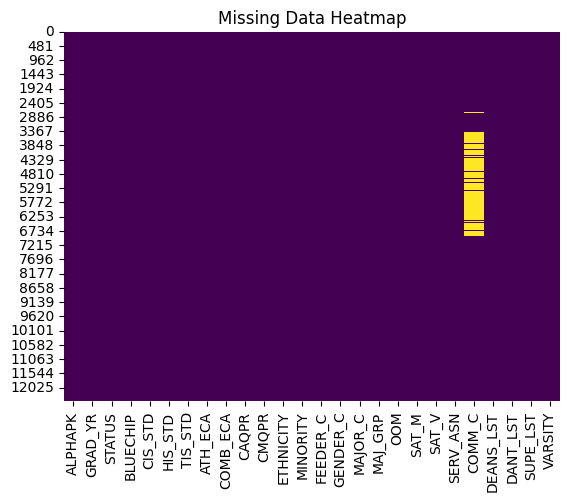

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(college_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**Task 4: Visualize Relationships Between Features** - <span style="color: blue">10 points:</span>
- Objective: Analyze relationships between SAT scores, GPAs, and graduation status.
- Instruction: Use Seaborn's pairplot() function to create a visual summary.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

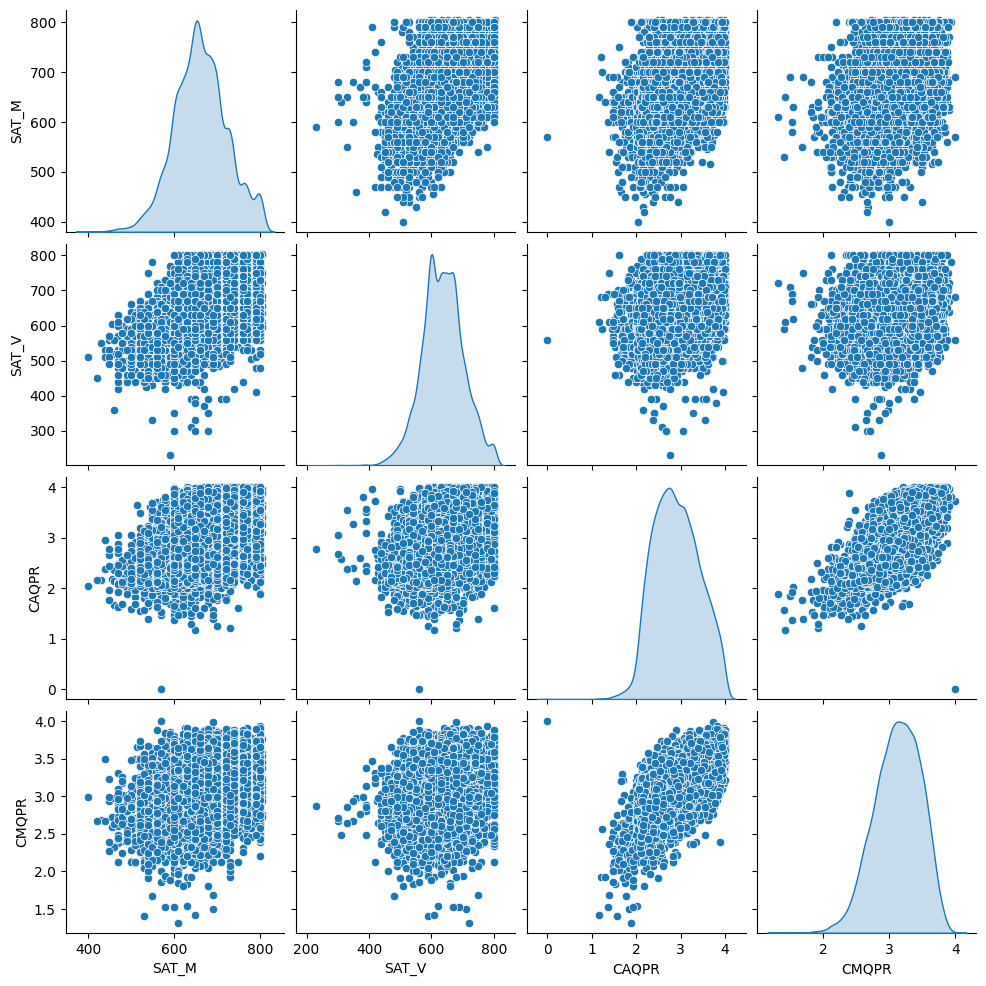

In [20]:
sns.pairplot(college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']], diag_kind='kde')
plt.show()

**Task 5: Train a Logistic Regression Model** - <span style="color: blue">10 points:</span>
- Objective: Predict graduation status (graduate or attrite) using SAT scores and GPAs.
- Instruction: Train a logistic regression model and evaluate accuracy.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the CollegeData dataset
dataset_path = r"C:\CollegeData.csv"
college_data = pd.read_csv(dataset_path)

# Filter only Attrite (0) and Graduate (40) rows
college_data = college_data[college_data['STATUS'].isin([0, 40])]

# Convert STATUS to binary (Graduate = 1, Attrite = 0)
college_data['STATUS'] = college_data['STATUS'].apply(lambda x: 1 if x == 40 else 0)

# Select features and target
X = college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']].dropna()  # Drop rows with NaN values in features
y = college_data.loc[X.index, 'STATUS']  # Align target with features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.711340206185567


**Task 6: Apply K-Means Clustering** - <span style="color: blue">10 points:</span>
- Objective: Group students based on their interest scores (CIS_STD, HIS_STD, TIS_STD).
- Instruction: Use K-Means clustering and visualize clusters.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

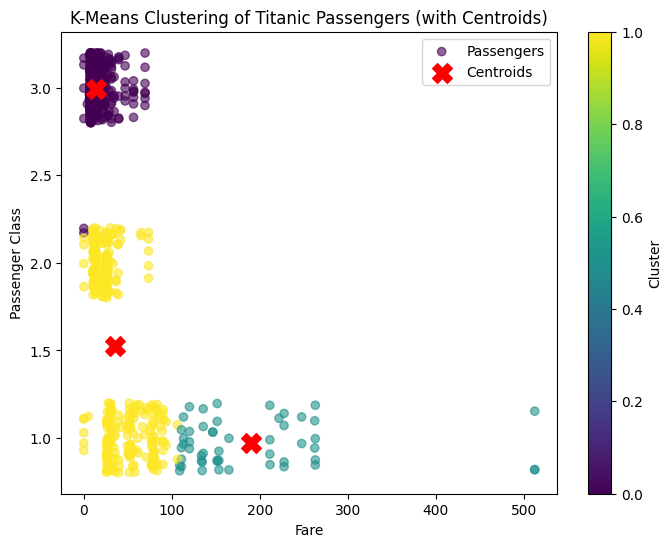

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variable to prevent loky CPU count warning
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # Adjust as needed based on your CPU count

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Handle missing values
clustering_data = titanic[['fare', 'pclass']].dropna()

# Add small random noise to 'pclass' to prevent straight lines in clustering
clustering_data['pclass_jittered'] = clustering_data['pclass'] + np.random.uniform(-0.2, 0.2, size=len(clustering_data))

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data[['fare', 'pclass_jittered']])

# Apply K-Means clustering with adjusted parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
titanic.loc[clustering_data.index, 'cluster'] = kmeans.fit_predict(scaled_features)

# Retrieve the centroids and transform them back to the original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Scatter plot with clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data['fare'], clustering_data['pclass_jittered'], c=titanic.loc[clustering_data.index, 'cluster'], cmap='viridis', alpha=0.6, label='Passengers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering of Titanic Passengers (with Centroids)")
plt.xlabel("Fare")
plt.ylabel("Passenger Class")
plt.legend()
plt.colorbar(label='Cluster')  # Ensure string is correctly closed
plt.show()

**Task 7: Perform PCA** - <span style="color: blue">10 points:</span>
- Objective: Reduce dimensionality of the dataset using SAT scores, GPAs, and interest scores.
- Instruction: Apply PCA and visualize the transformed data.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

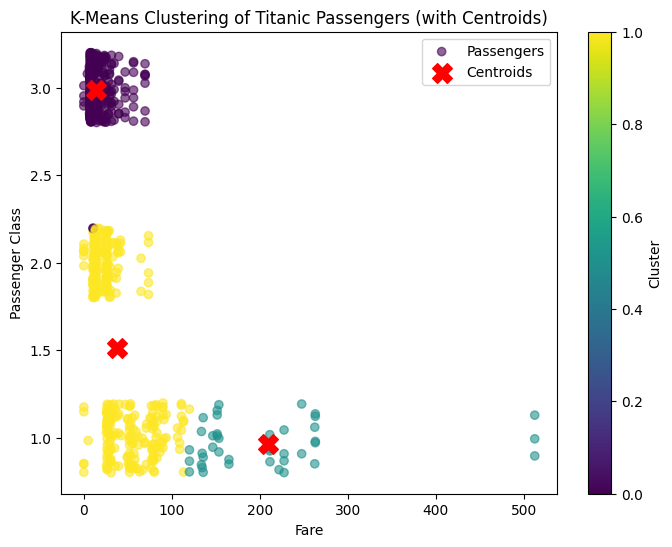

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set environment variable to prevent loky CPU count warning
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  # Adjust as needed based on your CPU count

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Handle missing values
clustering_data = titanic[['fare', 'pclass']].dropna()

# Add small random noise to 'pclass' to prevent straight lines in clustering
clustering_data['pclass_jittered'] = clustering_data['pclass'] + np.random.uniform(-0.2, 0.2, size=len(clustering_data))

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data[['fare', 'pclass_jittered']])

# Apply K-Means clustering with adjusted parameters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
titanic.loc[clustering_data.index, 'cluster'] = kmeans.fit_predict(scaled_features)

# Retrieve the centroids and transform them back to the original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Scatter plot with clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data['fare'], clustering_data['pclass_jittered'], c=titanic.loc[clustering_data.index, 'cluster'], cmap='viridis', alpha=0.6, label='Passengers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering of Titanic Passengers (with Centroids)")
plt.xlabel("Fare")
plt.ylabel("Passenger Class")
plt.legend()
plt.colorbar(label='Cluster')  # Ensure string is correctly closed
plt.show()

**Task 8: Calculate Correlations** - <span style="color: blue">10 points:</span>
- Objective: Identify correlations between numerical features.
- Instruction: Use .corr() to calculate correlation coefficients and visualize with a heatmap.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

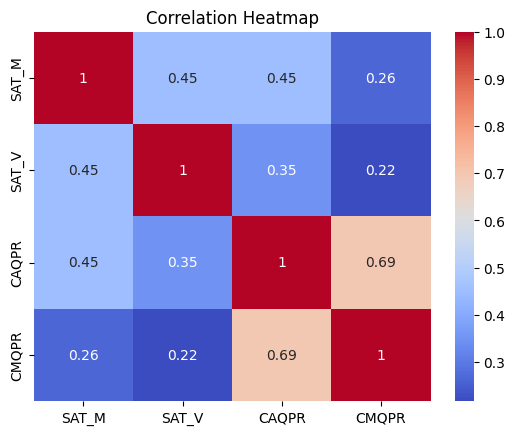

In [23]:
correlations = college_data[['SAT_M', 'SAT_V', 'CAQPR', 'CMQPR']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Task 9: Visualize GPA Distributions by Graduation Status** - <span style="color: blue">10 points:</span>
- Objective: Create a visualization showing the distribution of academic GPA (CAQPR) for different graduation statuses (Graduate, Attrite, and Enrolled).
- Instruction: Use Seaborn's boxplot() function to compare GPA distributions across the STATUS categories.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

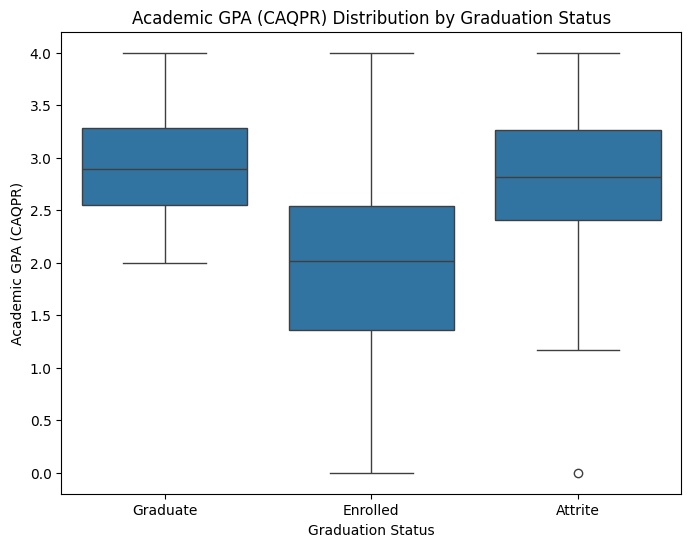

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CollegeData dataset
dataset_path = r"C:\CollegeData.csv"
college_data = pd.read_csv(dataset_path)

# Map numeric STATUS codes to human-readable labels
status_mapping = {0: 'Attrite', 30: 'Enrolled', 40: 'Graduate'}
college_data['STATUS_LABEL'] = college_data['STATUS'].map(status_mapping)

# Ensure there are no missing values in CAQPR and STATUS_LABEL
college_data = college_data.dropna(subset=['CAQPR', 'STATUS_LABEL'])

# Create a boxplot to compare CAQPR distributions by STATUS
plt.figure(figsize=(8, 6))
sns.boxplot(data=college_data, x='STATUS_LABEL', y='CAQPR')
plt.title('Academic GPA (CAQPR) Distribution by Graduation Status')
plt.xlabel('Graduation Status')
plt.ylabel('Academic GPA (CAQPR)')
plt.show()

**Task 10: Perform Hierarchical Clustering** - <span style="color: blue">10 points:</span>
- Objective: Visualize trends in average academic GPA (CAQPR) over graduation years (GRAD_YR) using Matplotlib. Analyze how academic performance changes over time and highlight key insights.
- Instruction: Use Matplotlib to create a line graph of average GPA (CAQPR) for each graduation year (GRAD_YR). Highlight and annotate the graduation years with the highest and lowest average GPAs.

<span style="color: blue">Enter your Puthon Code for this problem below:</span>

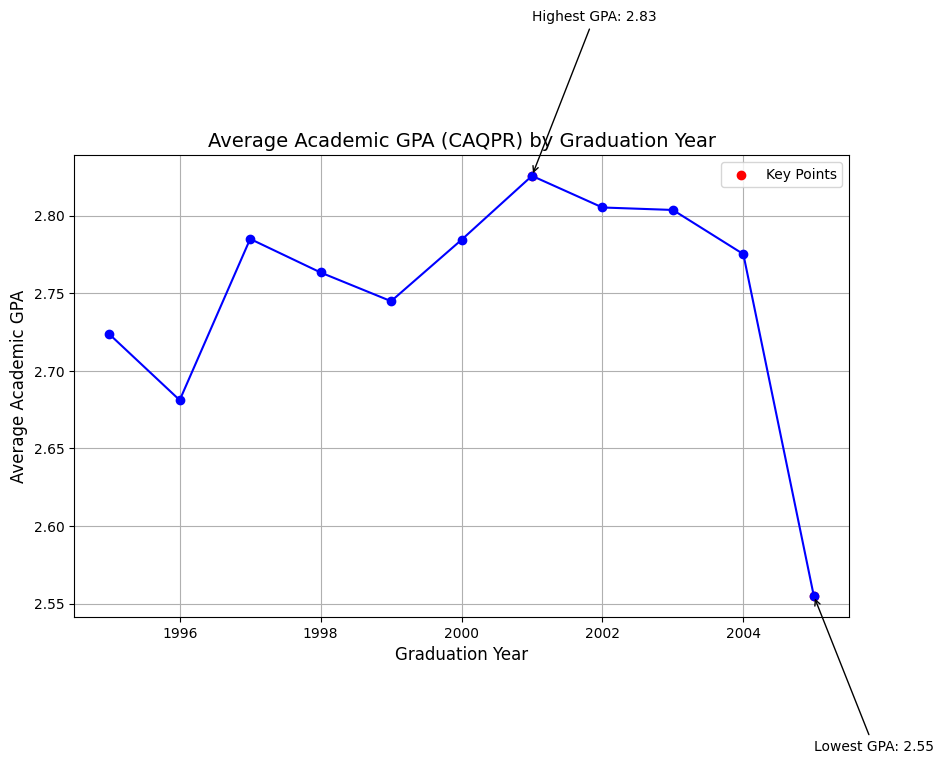

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CollegeData dataset
dataset_path = r"C:\CollegeData.csv"
college_data = pd.read_csv(dataset_path)

# Handle missing values by dropping rows with NaN in GRAD_YR or CAQPR
college_data = college_data.dropna(subset=['GRAD_YR', 'CAQPR'])

# Calculate average GPA (CAQPR) for each graduation year
avg_gpa_by_year = college_data.groupby('GRAD_YR')['CAQPR'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_gpa_by_year.index, avg_gpa_by_year.values, marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title('Average Academic GPA (CAQPR) by Graduation Year', fontsize=14)
plt.xlabel('Graduation Year', fontsize=12)
plt.ylabel('Average Academic GPA', fontsize=12)
plt.grid(True)

# Highlight specific points (e.g., lowest and highest GPA years)
min_gpa_year = avg_gpa_by_year.idxmin()
max_gpa_year = avg_gpa_by_year.idxmax()
plt.scatter([min_gpa_year, max_gpa_year], 
            [avg_gpa_by_year[min_gpa_year], avg_gpa_by_year[max_gpa_year]], 
            color='red', label='Key Points')

# Annotate the chart
plt.annotate(f'Lowest GPA: {avg_gpa_by_year[min_gpa_year]:.2f}', 
             xy=(min_gpa_year, avg_gpa_by_year[min_gpa_year]), 
             xytext=(min_gpa_year, avg_gpa_by_year[min_gpa_year] - 0.1), 
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.annotate(f'Highest GPA: {avg_gpa_by_year[max_gpa_year]:.2f}', 
             xy=(max_gpa_year, avg_gpa_by_year[max_gpa_year]), 
             xytext=(max_gpa_year, avg_gpa_by_year[max_gpa_year] + 0.1), 
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Add a legend
plt.legend()
plt.show()

## Submission Instructions
1. Save this notebook with all your screenshots and outputs included.
2. Download [File | Download] the notebook, **in the prescribed file naming convention.**
3. Submit the notebook file (`.ipynb`) to Canvas by the due date. You may also want to upload a PDF version of the assignment by opening the notebook in JupyterLab (see icon on top right of Jupyter Notebook environment) and `File | Print | Save as PDF`.
4. Ensure all steps are completed and all required screenshots are included.